In [17]:

import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv('decisionTree_Data.csv')
X = dataset.iloc[:, [0,1]].values
y = dataset.iloc[:, 2].values

In [18]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)

In [19]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:

from sklearn.tree import DecisionTreeClassifier
classifer = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifer.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [21]:
y_pred = classifer.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.91

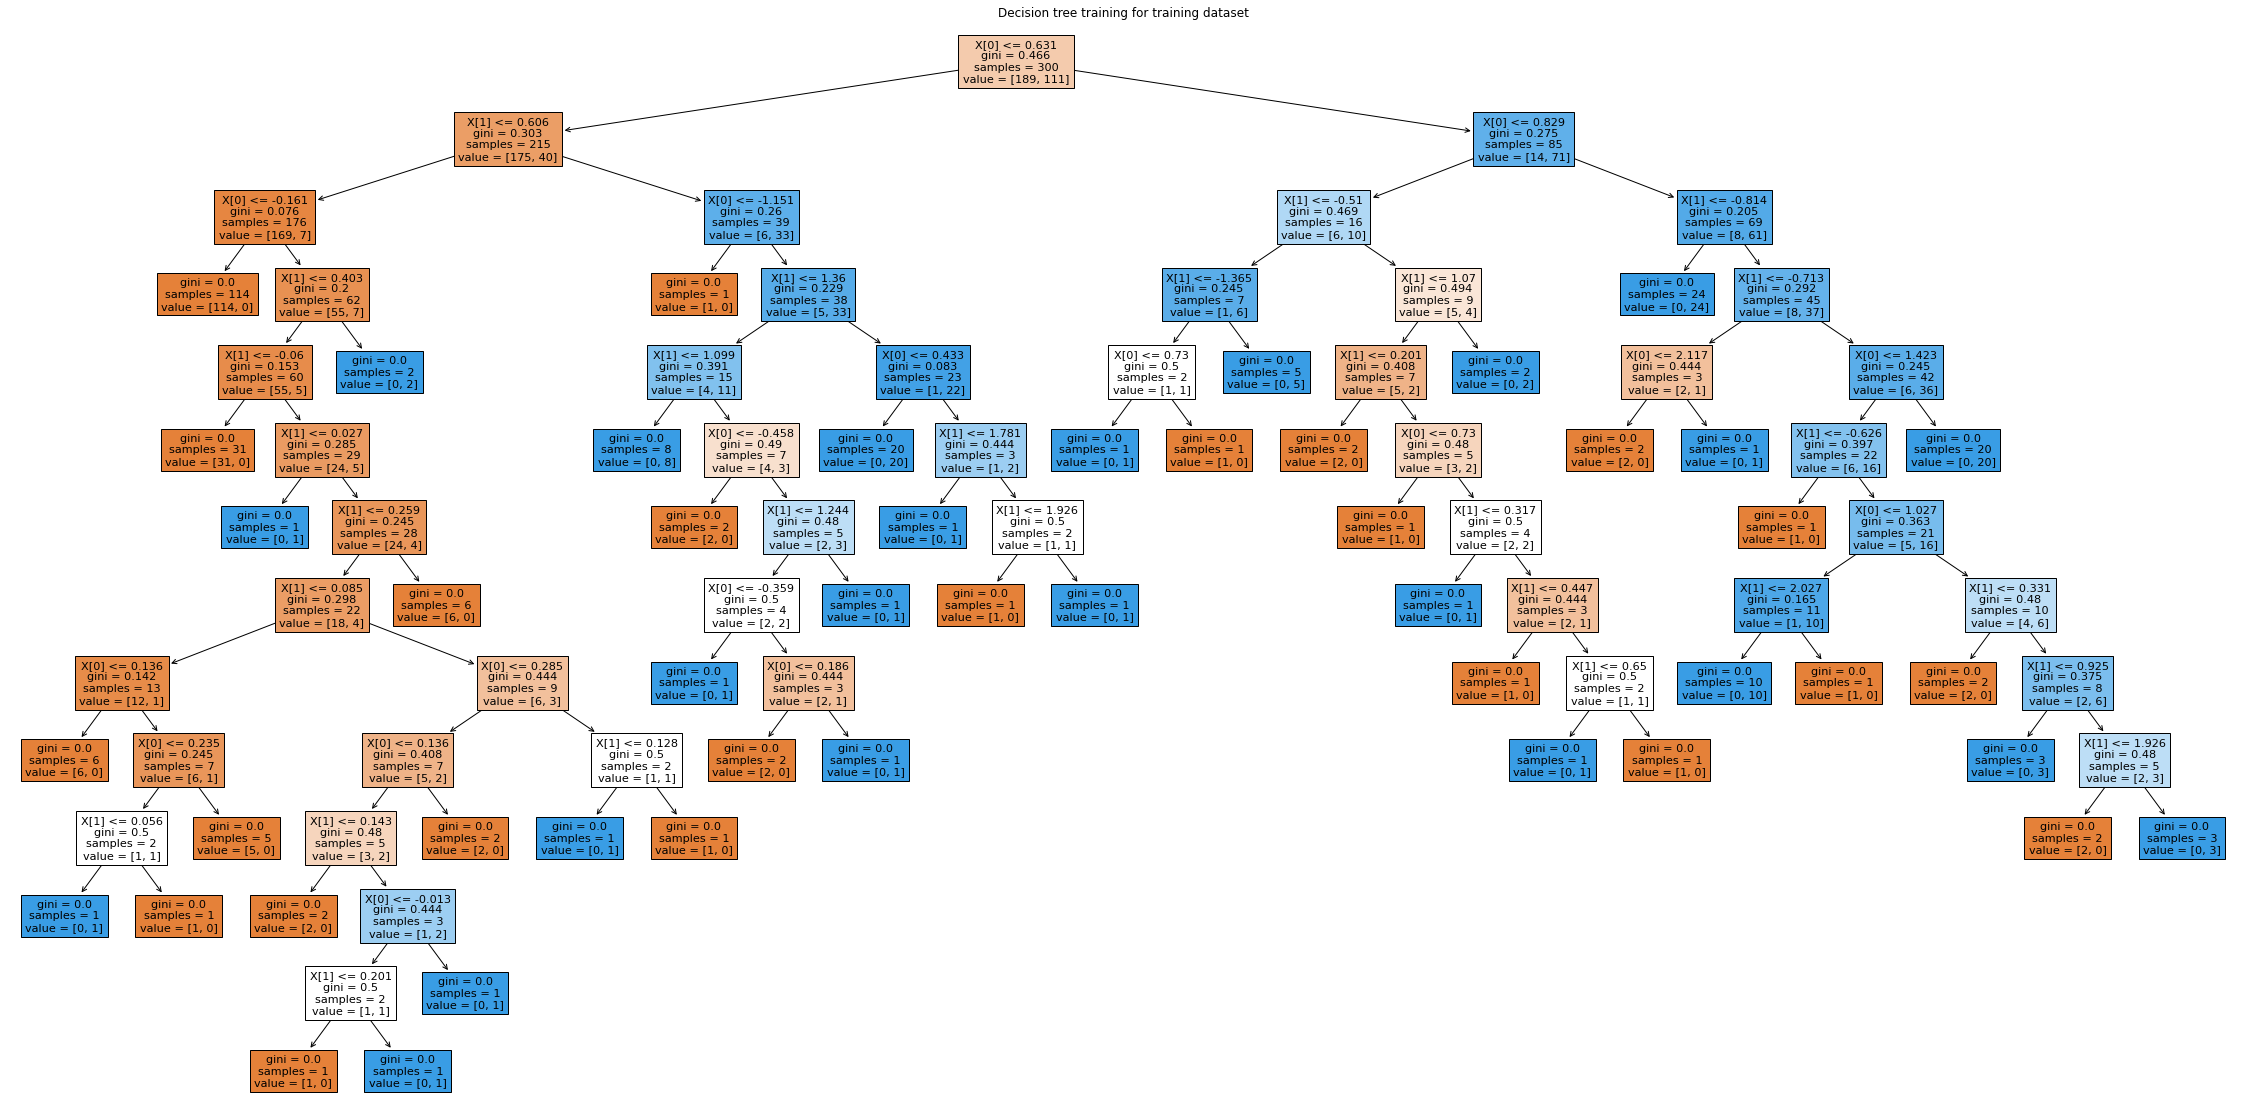

In [23]:

from sklearn.tree import DecisionTreeClassifier, plot_tree
clf = DecisionTreeClassifier()
plt.figure(figsize=(40,20))
clf = clf.fit(X_train, y_train)
plot_tree(clf, filled=True)
plt.title("Decision tree training for training dataset")
plt.show()

In [24]:

from sklearn import tree
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_0 <= 0.63
|   |--- feature_1 <= 0.61
|   |   |--- feature_0 <= -0.16
|   |   |   |--- class: 0
|   |   |--- feature_0 >  -0.16
|   |   |   |--- feature_1 <= 0.40
|   |   |   |   |--- feature_1 <= -0.06
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_1 >  -0.06
|   |   |   |   |   |--- feature_1 <= 0.03
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_1 >  0.03
|   |   |   |   |   |   |--- feature_1 <= 0.26
|   |   |   |   |   |   |   |--- feature_1 <= 0.08
|   |   |   |   |   |   |   |   |--- feature_0 <= 0.14
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_0 >  0.14
|   |   |   |   |   |   |   |   |   |--- feature_0 <= 0.24
|   |   |   |   |   |   |   |   |   |   |--- feature_1 <= 0.06
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- feature_1 >  0.06
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   

In [25]:
# defining a function which takes acutal and pred values
def confusion_values(y_actual, y_pred):

    # initializing the values with zero value
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    # iterating through the values
    for i in range(len(y_pred)): 
        if y_actual[i]==y_pred[i]==1:
           TP += 1
        if y_pred[i]==1 and y_actual[i]!=y_pred[i]:
           FP += 1
        if y_actual[i]==y_pred[i]==0:
           TN += 1
        if y_pred[i]==0 and y_actual[i]!=y_pred[i]:
           FN += 1

    # printing the values
    print("True Positive: ", TP)
    print("False Positive:", FP)
    print("True Negative: ", TN)
    print("False Negative: ", FN)

# calling the function
confusion_values(y_test, y_pred)

True Positive:  29
False Positive: 6
True Negative:  62
False Negative:  3
